# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#Do we need a URL?
#"http://api.openweathermap.org/data/2.5/weather?"????

# Print the city count to confirm sufficient count
num_cities = len(cities)
print (f"The number of cities is: {num_cities}")

The number of cities is: 651


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#URL and Units
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

#Lists
city_name = []
city_lats = []
city_lngs = []
max_temp = []
city_humid = []
city_cloud = []
wind_speeds = []
countries = []
dates = []
city_list = []

#Counts
num_record = 0
num_set = 1

#Begin 
print("Beginning Data Retrival")

#Loops
for city in cities:
    try:
        response_data = requests.get(base_url + city.replace(" ","&")).json()
        city_name.append(response_data['name'])
        city_lats.append(response_data['coord']['lat'])
        city_lngs.append(response_data['coord']['lon'])
        max_temp.append(response_data['main']['temp_max'])
        city_humid.append(response_data['main']['humidity'])
        city_cloud.append(response_data['clouds']['all'])
        wind_speeds.append(response_data['wind']['speed'])
        countries.append(response_data['sys']['country'])
        dates.append(response_data['dt'])
        if num_record > 48:
            num_record = 1
            num_set += 1
            city_list.append(city)
        else:
            num_record += 1
            city_list.append(city)
        print(f"Processing Record {num_record} of Set {num_set} | {city}")
    except Exception:
        print("City not found. Skipping...")
#End    
print("Data Retrieval Complete..")

Beginning Data Retrival
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | bukama
Processing Record 3 of Set 1 | sandy bay
Processing Record 4 of Set 1 | vao
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | haines junction
Processing Record 10 of Set 1 | tautira
City not found. Skipping...
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | avesta
Processing Record 14 of Set 1 | norfolk
Processing Record 15 of Set 1 | saiha
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | torbay
City not found. Skipping...
Processing Record 18 of Set 1 | oswego
Processing Record 19 of Set 1 | vestmanna
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | osmena
Processing Record 22 of Set 1 | cockburn town
City not

Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | bredasdorp
Processing Record 40 of Set 4 | west wendover
City not found. Skipping...
Processing Record 41 of Set 4 | safford
Processing Record 42 of Set 4 | puerto escondido
Processing Record 43 of Set 4 | zermatt
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | axim
Processing Record 46 of Set 4 | makakilo city
Processing Record 47 of Set 4 | san buenaventura
Processing Record 48 of Set 4 | talnakh
City not found. Skipping...
Processing Record 49 of Set 4 | geraldton
Processing Record 1 of Set 5 | port shepstone
Processing Record 2 of Set 5 | port lincoln
City not found. Skipping...
Processing Record 3 of Set 5 | clarence town
Processing Record 4 of Set 5 | sal rei
Processing Record 5 of Set 5 | tromso
Processing Record 6 of Set 5 | moose factory
Processing Record 7 of Set 5 | agawam
Processing Record 8 of Set 5 | lamu
Processing Record 9 of Set 5 | shelburne
Processing Record 10 of Set 5

Processing Record 25 of Set 8 | krasnoselkup
Processing Record 26 of Set 8 | santa maria
Processing Record 27 of Set 8 | nhulunbuy
Processing Record 28 of Set 8 | ende
Processing Record 29 of Set 8 | sitka
Processing Record 30 of Set 8 | green river
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | bichura
Processing Record 33 of Set 8 | koslan
Processing Record 34 of Set 8 | sambava
City not found. Skipping...
Processing Record 35 of Set 8 | mangrol
Processing Record 36 of Set 8 | laguna
Processing Record 37 of Set 8 | souillac
Processing Record 38 of Set 8 | olinda
Processing Record 39 of Set 8 | lingao
Processing Record 40 of Set 8 | morehead
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | griffith
Processing Record 43 of Set 8 | nijar
City not found. Skipping...
Processing Record 44 of Set 8 | kavieng
City not found. Skipping...
Processing Record 45 of Set 8 | mareeba
Processing Record 46 of Set 8 | ola
Processing Record 47 of Set 8 | 

Processing Record 9 of Set 12 | denison
Processing Record 10 of Set 12 | neryungri
Processing Record 11 of Set 12 | valparaiso
Processing Record 12 of Set 12 | bousso
Processing Record 13 of Set 12 | coari
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 12 | komsomolskiy
Processing Record 15 of Set 12 | sao paulo de olivenca
Processing Record 16 of Set 12 | copiapo
Processing Record 17 of Set 12 | borzya
Processing Record 18 of Set 12 | irbeyskoye
Processing Record 19 of Set 12 | hrodna
Processing Record 20 of Set 12 | khilok
Processing Record 21 of Set 12 | ucluelet
Processing Record 22 of Set 12 | cocobeach
Processing Record 23 of Set 12 | timra
City not found. Skipping...
Processing Record 24 of Set 12 | vanimo
Processing Record 25 of Set 12 | kawambwa
Processing Record 26 of Set 12 | folldal
Processing Record 27 of Set 12 | peniche
Processing Record 28 of Set 12 | coahuayana
Processing Record 29 of Set 12 | stuttgart
Processing Record 30 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Dictionary for DF
weatherpy_dictionary = {
        "City":city_name ,
        "Lat":city_lats ,
        "Lng":city_lngs ,
        "Max Temp":max_temp ,
        "Humidity":city_humid ,
        "Cloudiness":city_cloud ,
        "Wind Speed":wind_speeds ,
        "Country":countries ,
        "Date":dates ,
}

#DF
weatherpy_df =pd.DataFrame(weatherpy_dictionary)
#Show
weatherpy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta,38.7333,-28.2667,62.60,82,75,17.27,PT,1616174435
1,Bukama,-9.2000,25.8500,75.40,82,85,1.41,CD,1616174436
2,Sandy City,40.5720,-111.8606,61.00,44,1,23.02,US,1616174287
3,Vao,-22.6667,167.4833,76.41,77,100,22.24,NC,1616174436
4,Hilo,19.7297,-155.0900,64.40,88,1,4.74,US,1616174437


In [22]:
#Convert to csv.
weatherpy_df.to_csv("output_cities_data", index=False)

In [ ]:
#Falta la tabla con count mean std min 25, 50, 75, max. 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weatherpy_df_humidity = weatherpy_df[weatherpy_df['Humidity']>100]
weatherpy_df_humidity


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
print(f"There are no cities that match the criteria of >100% humidity, so we skip this step.")


There are no cities that match the criteria of >100% humidity, so we skip this step.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

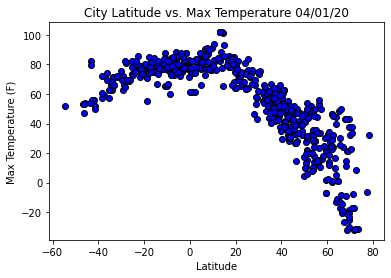

<Figure size 432x288 with 0 Axes>

This table is showing the correlation between latitude and maximum temperature, and we could determine that as latitude increases the maximum temperatures tend to decrease and viceversa.


In [26]:
#Define X and Y values. 
latitude = weatherpy_df['Lat']
temperature = weatherpy_df['Max Temp']

plt.scatter(latitude, temperature, color="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature 04/01/20")
plt.show()

#Save as image
plt.savefig("Images/lat_temp_plot.png")
plt.show()

print("This table is showing the correlation between latitude and maximum temperature, and we could determine that as latitude increases the maximum temperatures tend to decrease and viceversa.")

## Latitude vs. Humidity Plot

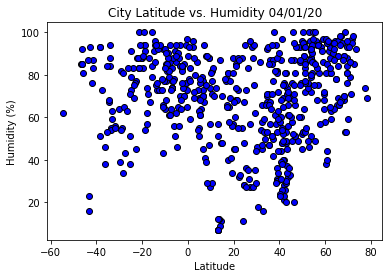

<Figure size 432x288 with 0 Axes>

This plot shows us the correlation between latitude and humidity. However there is no direct relationship between this two, as we can see there is no specific pattern.


In [27]:
#Define X and Y values. 
latitude = weatherpy_df['Lat']
humidity = weatherpy_df['Humidity']

plt.scatter(latitude, humidity, color="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity 04/01/20")
plt.show()

#Save as image
plt.savefig("Images/lat_humidity_plot.png")
plt.show()

print("This plot shows us the correlation between latitude and humidity. However there is no direct relationship between this two, as we can see there is no specific pattern.")

## Latitude vs. Cloudiness Plot

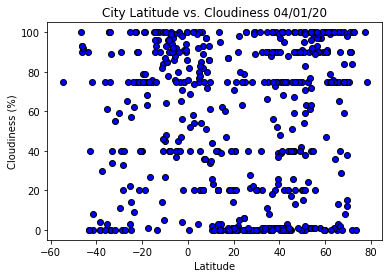

<Figure size 432x288 with 0 Axes>

This plot shows us the correlation between latituda and cloudiness by %. We can observe some straighter more repetitive patterns in some specific percentages of cloudiness like 0%, 20%, 40%, 75-78% and 100%.


In [29]:
#Define X and Y values. 
latitude = weatherpy_df['Lat']
cloudiness = weatherpy_df['Cloudiness']

plt.scatter(latitude, cloudiness, color="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness 04/01/20")
plt.show()

#Save as image
plt.savefig("Images/lat_cloudiness_plot.png")
plt.show()

print("This plot shows us the correlation between latituda and cloudiness by %. We can observe some straighter more repetitive patterns in some specific percentages of cloudiness like 0%, 20%, 40%, 75-78% and 100%.")

## Latitude vs. Wind Speed Plot

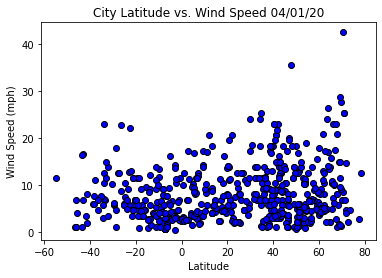

<Figure size 432x288 with 0 Axes>

This plot shows us the correlation between latitude and wind speed by miles per hour. We can see in the graph that there is no remarkable relationship, but we can deduct that the highest windspeeds come from the most elevated latitude.


In [30]:
#Define X and Y values. 
latitude = weatherpy_df['Lat']
wspeed = weatherpy_df['Wind Speed']

plt.scatter(latitude, wspeed, color="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed 04/01/20")
plt.show()

#Save as image
plt.savefig("Images/lat_wspeed_plot.png")
plt.show()

print("This plot shows us the correlation between latitude and wind speed by miles per hour. We can see in the graph that there is no remarkable relationship, but we can deduct that the highest windspeeds come from the most elevated latitude.")

## Linear Regression

In [13]:
#DF for Northern and Southern Hemishphere

#North
northernh_df = weatherpy_df[weatherpy_df["Lat"]>0]
northernh_df

#South
southernh_df = weatherpy_df[weatherpy_df["Lat"]<0]
southernh_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bukama,-9.2000,25.8500,75.40,82,85,1.41,CD,1616174436
3,Vao,-22.6667,167.4833,76.41,77,100,22.24,NC,1616174436
5,Rikitea,-23.1203,-134.9692,80.33,76,100,12.71,PF,1616174419
6,Ushuaia,-54.8000,-68.3000,51.80,62,75,11.50,AR,1616174364
9,Tautira,-17.7333,-149.1500,80.60,74,75,3.44,PF,1616174439
...,...,...,...,...,...,...,...,...,...
549,Valparaíso,-33.0393,-71.6273,66.20,59,40,11.50,CL,1616174524
551,Coari,-4.0850,-63.1414,88.11,56,90,2.55,BR,1616174736
554,Copiapó,-27.3667,-70.3333,69.80,43,0,12.66,CL,1616174738
562,Vanimo,-2.6741,141.3028,77.72,84,56,3.06,PG,1616174742


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared:0.7507502164502585


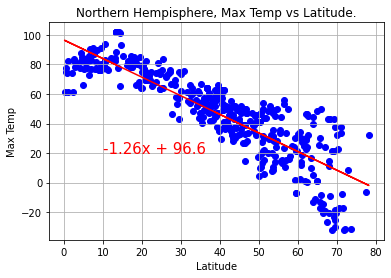

<Figure size 432x288 with 0 Axes>

In [14]:
#State axis. Perform linear regression temp vs latitude.
n_latitude = northernh_df["Lat"]
n_temperature = northernh_df["Max Temp"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_temperature)

#Regression values
reg_value = n_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(n_latitude, n_temperature, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hempisphere, Max Temp vs Latitude.")
plt.grid()

plt.plot(n_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/maxtemp_lat_regression_plot_north.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared:0.4837573853316776


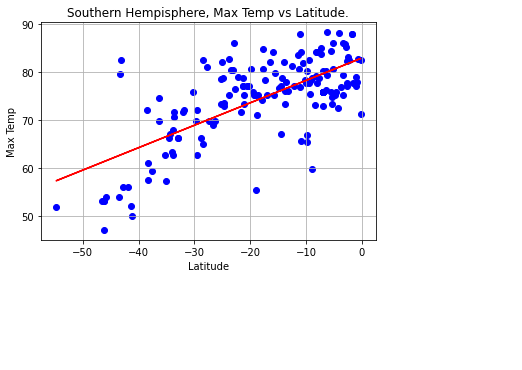

<Figure size 432x288 with 0 Axes>

In [15]:
#State axis. Perform linear regression temp vs latitude.
s_latitude = southernh_df["Lat"]
s_temperature = southernh_df["Max Temp"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_temperature)

#Regression values
reg_value = s_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(s_latitude, s_temperature, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hempisphere, Max Temp vs Latitude.")
plt.grid()

plt.plot(s_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/maxtemp_lat_regression_plot_south.png")

In [31]:
print("Max Temp vs Latitude Regression Analysis:")
print("When comparing the two plots shown above we can see that there is an inverse correlation between these two variables in the southern and northern hempispheres.")
print("In the Northern Hemisphere we can see that as latitude increases the maximum temperature decreases, while in the Southern Hempishere as latitude decreases so does the maximum temperature.")

Max Temp vs Latitude Regression Analysis:
When comparing the two plots shown above we can see that there is an inverse correlation between these two variables in the southern and northern hempispheres.
In the Northern Hemisphere we can see that as latitude increases the maximum temperature decreases, while in the Southern Hempishere as latitude decreases so does the maximum temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared:0.0855837370500328


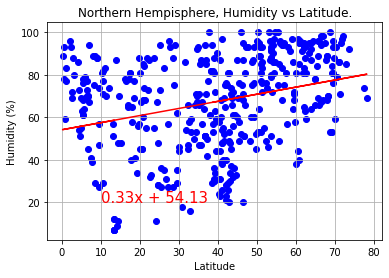

<Figure size 432x288 with 0 Axes>

In [16]:
#State axis. Perform linear regression temp vs latitude.
n_latitude = northernh_df["Lat"]
n_humidity = northernh_df["Humidity"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_humidity)

#Regression values
reg_value = n_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(n_latitude, n_humidity, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hempisphere, Humidity vs Latitude.")
plt.grid()

plt.plot(n_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/humidity_lat_regression_plot_north.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared:0.03807621743232178


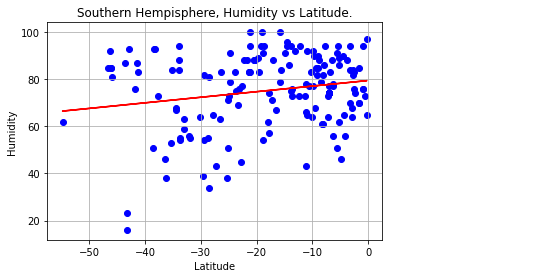

<Figure size 432x288 with 0 Axes>

In [17]:
#State axis. Perform linear regression temp vs latitude.
s_latitude = southernh_df["Lat"]
s_humidity = southernh_df["Humidity"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_humidity)

#Regression values
reg_value = s_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(s_latitude, s_humidity, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hempisphere, Humidity vs Latitude.")
plt.grid()

plt.plot(s_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/humidity_lat_regression_plot_south.png")

In [32]:
print("Humidity (%) vs. Latitude Linear Regression Analysis")
print("As we can see in the plots shown above we could deduct from the regression lines that humidity and latitude have a similar increasement pattern in both hemispheres. In average as latitude increases so does humidity.")

Humidity (%) vs. Latitude Linear Regression Analysis
As we can see in the plots shown above we could deduct from the regression lines that humidity and latitude have a similar increasement pattern in both hemispheres. In average as latitude increases so does humidity.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared:0.03137871036845788


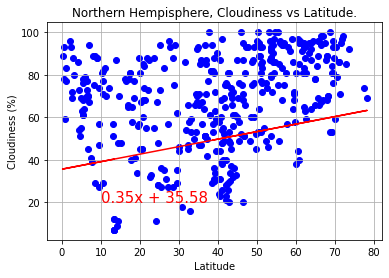

<Figure size 432x288 with 0 Axes>

In [18]:
#State axis. Perform linear regression temp vs latitude.
n_latitude = northernh_df["Lat"]
n_cloudiness = northernh_df["Cloudiness"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_cloudiness)

#Regression values
reg_value = n_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(n_latitude, n_humidity, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hempisphere, Cloudiness vs Latitude.")
plt.grid()

plt.plot(n_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/cloudiness_lat_regression_plot_north.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared:0.11168631777390527


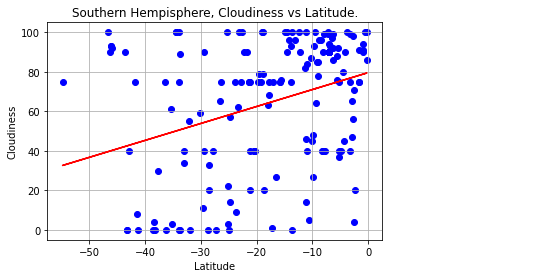

<Figure size 432x288 with 0 Axes>

In [19]:
#State axis. Perform linear regression temp vs latitude.
s_latitude = southernh_df["Lat"]
s_cloudiness = southernh_df["Cloudiness"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_cloudiness)

#Regression values
reg_value = s_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(s_latitude, s_cloudiness, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hempisphere, Cloudiness vs Latitude.")
plt.grid()

plt.plot(s_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/cloudiness_lat_regression_plot_south.png")

In [33]:
print("Cloudiness (%) vs. Latitude Linear Regression Analysis")
print("As we can see in the plots shown above the linear regression lines show a similar increasement pattern, as latitude increases so does cloudiness.")
print ("However there are some other factors we could imply, one is that the line is more inclined in the Southern Hempishere, and another one is that the plot from the Northern Hemisphere has way more presence on the top side of cloudiness than the Southern.")

Cloudiness (%) vs. Latitude Linear Regression Analysis
As we can see in the plots shown above the linear regression lines show a similar increasement pattern, as latitude increases so does cloudiness.
However there are some other factors we could imply, one is that the line is more inclined in the Southern Hempishere, and another one is that the plot from the Northern Hemisphere has way more presence on the top side of cloudiness than the Southern.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared:0.01943589328341656


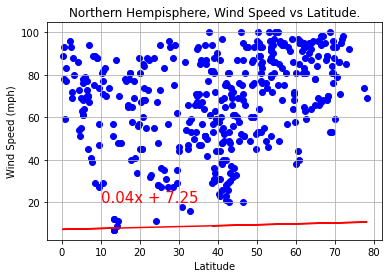

<Figure size 432x288 with 0 Axes>

In [20]:
#State axis. Perform linear regression temp vs latitude.
n_latitude = northernh_df["Lat"]
n_wspeed = northernh_df["Wind Speed"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_wspeed)

#Regression values
reg_value = n_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(n_latitude, n_humidity, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hempisphere, Wind Speed vs Latitude.")
plt.grid()

plt.plot(n_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/wspeed_lat_regression_plot_north.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared:0.062297910862769916


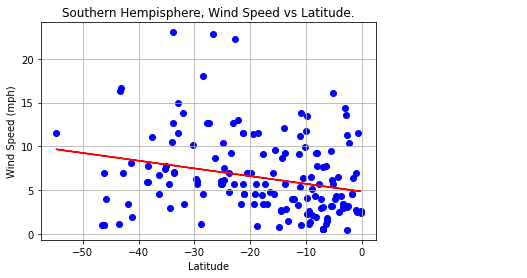

<Figure size 432x288 with 0 Axes>

In [21]:
#State axis. Perform linear regression temp vs latitude.
s_latitude = southernh_df["Lat"]
s_wspeed = southernh_df["Wind Speed"]
(slope, y_intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_wspeed)

#Regression values
reg_value = s_latitude * slope + y_intercept

#Line equation string.
linear_label = f"{round(slope, 2)}x + {round(y_intercept, 2)}"
linear_label

#Plot.
plt.scatter(s_latitude, s_wspeed, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hempisphere, Wind Speed vs Latitude.")
plt.grid()

plt.plot(s_latitude, reg_value, "r-")
plt.annotate(linear_label,(10,20), fontsize=15, color="red")

print("R-squared:" + str(rvalue*rvalue))
plt.show()

plt.savefig("Images/wspeed_lat_regression_plot_south.png")

In [35]:
print("Humidity (%) vs. Latitude Linear Regression Analysis")
print("As we can see on the plots shown above, there is no pronounced relationship between wind speed and latitude. The plot of the Northern Hemisphere looks even, except for the fact that there is no lower windspeed data when the latitude is high. While in the Southern Hemisphere there is more pronounced lower wind speed when the latitude is near 0.")

Humidity (%) vs. Latitude Linear Regression Analysis
As we can see on the plots shown above, there is no pronounced relationship between wind speed and latitude. The plot of the Northern Hemisphere looks even, except for the fact that there is no lower windspeed data when the latitude is high. While in the Southern Hemisphere there is more pronounced lower wind speed when the latitude is near 0.
